In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from scipy.stats import linregress

#Pull in csv from total yearly rent vs. income
path = ("../output_data/spending_on_rent.csv")
spending = pd.read_csv(path)

path_2 = ("../output_data/rental(total)_income_merged.csv")
merged = pd.read_csv(path_2)

In [3]:
#Pull in homelessness data
path = ("../Homelessness Data/2015_homelessness.csv")
homeless_2015 = pd.read_csv(path)

path_2 = ("../Homelessness Data/2016_homelessness.csv")
homeless_2016 = pd.read_csv(path_2)

path_3 = ("../Homelessness Data/2017_homelessness.csv")
homeless_2017 = pd.read_csv(path_3)

In [4]:
#Clean up homeless data
homeless_2015 = homeless_2015[["State", "Total Homeless, 2015"]]
homeless_2016 = homeless_2016[["State", "Total Homeless, 2016"]]
homeless_2017 = homeless_2017[["State", "Total Homeless, 2017"]]

#Merge em
all_homeless = pd.merge(homeless_2015, homeless_2016, on="State")
all_homeless = pd.merge(all_homeless, homeless_2017, on="State")

#Drop na and data that we don't have from others
all_homeless = all_homeless.dropna()
all_homeless = all_homeless.loc[(all_homeless["State"]!="ND") & (all_homeless["State"]!="NE") & 
                                (all_homeless["State"]!="PR") & (all_homeless["State"]!="MP") & 
                                (all_homeless["State"]!="GU") & (all_homeless["State"]!="VI") & 
                                (all_homeless["State"]!="VT") & (all_homeless["State"]!="Total")]
all_homeless = all_homeless.reset_index(drop=True)
all_homeless = all_homeless.replace({"AK":"Alaska", "AL":"Alabama", "AR":"Arkansas", "AZ":"Arizona",
                                    "CA":"California", "CO":"Colorado", "CT":"Connecticut", "DE":"Delaware",
                                    "FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois",
                                    "IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana",
                                    "ME":"Maine","MD":"Maryland","MI":"Michigan","MN":"Minnesota","MS":"Mississippi",
                                    "MO":"Missouri","MT":"Montana","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey",
                                    "NM":"New Mexico","NY":"New York","NC":"North Carolina","OH":"Ohio","OK":"Oklahoma",
                                    "OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina",
                                    "SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia",
                                    "WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming",
                                    "DC":"District of Columbia", "MA":"Massachusetts"})

all_homeless = all_homeless.rename(columns={"Total Homeless, 2015":"2015 Total Homeless",
                                           "Total Homeless, 2016":"2016 Total Homeless",
                                           "Total Homeless, 2017":"2017 Total Homeless"})

#merge datasets and remove commas
all = pd.merge(merged, all_homeless, on="State")
all["2015 Total Homeless"] = all["2015 Total Homeless"].str.replace(",","").astype(int)
all['2016 Total Homeless'] = all['2016 Total Homeless'].str.replace(",","").astype(int)
all['2017 Total Homeless'] = all["2017 Total Homeless"].str.replace(",","").astype(int)
all

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.,2015 Total Homeless,2016 Total Homeless,2017 Total Homeless
0,Alabama,11400.0,11700.0,11970.0,300.0,270.0,46053,48237,51113,2184,2876,3970,4111,3793
1,Alaska,20190.0,19800.0,19170.0,-390.0,-630.0,77717,77351,72231,-366,-5120,1956,1940,1845
2,Arizona,14700.0,15000.0,16200.0,300.0,1200.0,54060,58328,61125,4268,2797,9896,9707,8947
3,Arkansas,12000.0,12000.0,12600.0,0.0,600.0,44282,46894,48829,2612,1935,2560,2463,2467
4,California,27510.0,28740.0,31500.0,1230.0,2760.0,65843,68070,69759,2227,1689,115738,118142,134278
5,Colorado,19500.0,20400.0,21600.0,900.0,1200.0,68906,72084,74172,3178,2088,9953,10550,10940
6,Connecticut,21000.0,20400.0,21000.0,-600.0,600.0,75417,77556,72780,2139,-4776,4047,3902,3388
7,Delaware,15600.0,15600.0,15600.0,0.0,0.0,59759,59294,62318,-465,3024,953,1070,994
8,District of Columbia,30000.0,30300.0,31200.0,300.0,900.0,72501,72508,83382,7,10874,7298,8350,7473
9,Florida,19800.0,20280.0,20700.0,480.0,420.0,50518,52277,53681,1759,1404,35900,33559,32190


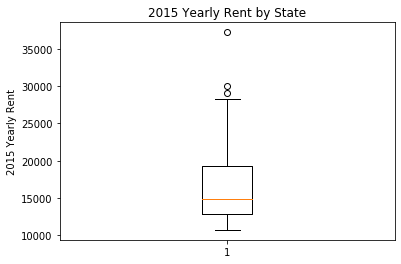

In [5]:
#See if there are any outliers 2015
fig1, ax1 = plt.subplots() 
rent_15 = all["2015 Yearly Rent"]
ax1.set_title('2015 Yearly Rent by State') 
ax1.set_ylabel('2015 Yearly Rent')
ax1.boxplot(rent_15) 
plt.show()

In [6]:
#Use quartiles to find outliers
quartiles = rent_15.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = all.loc[(all['2015 Yearly Rent'] < lower_bound) | (all['2015 Yearly Rent'] > upper_bound)] 
outliers

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.,2015 Total Homeless,2016 Total Homeless,2017 Total Homeless
8,District of Columbia,30000.0,30300.0,31200.0,300.0,900.0,72501,72508,83382,7,10874,7298,8350,7473
21,Massachusetts,29100.0,30000.0,30000.0,900.0,0.0,70214,73820,73227,3606,-593,21135,19608,17565
31,New York,37200.0,36570.0,38700.0,-630.0,2130.0,60017,62758,62447,2741,-311,88250,86352,89503


In [7]:
no_outliers_15 = all.loc[(all['2015 Yearly Rent'] > lower_bound) & (all["2015 Yearly Rent"] < upper_bound)]

The r-squared: 0.4922466562092009


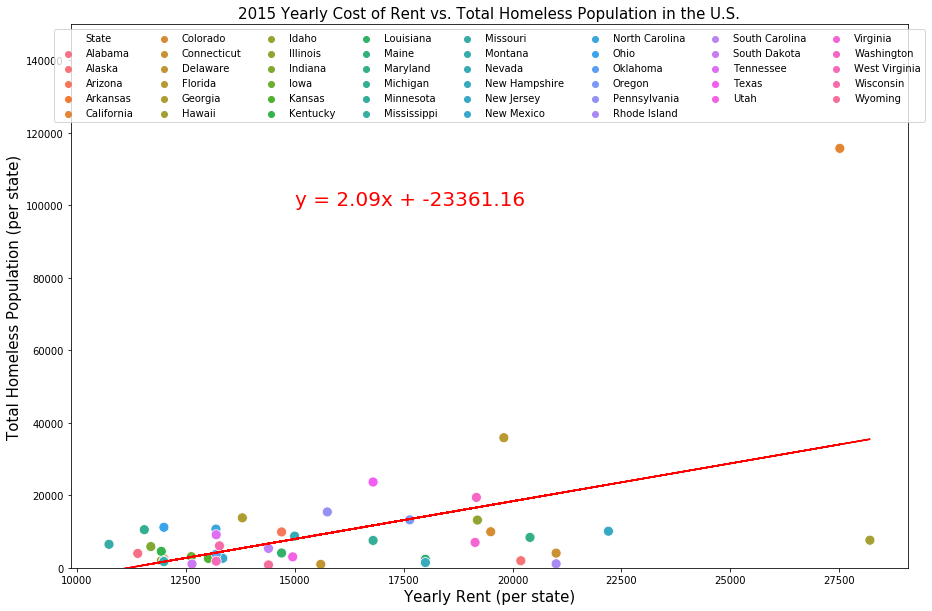

In [37]:
#2015 correlation b/w rent price and homelessness
x_values = no_outliers_15["2015 Yearly Rent"].astype('float')
y_values = no_outliers_15["2015 Total Homeless"].astype('float')
states = no_outliers_15["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(15000,100000),fontsize=20,color="red")
plt.ylim(0,150000)
plt.xlabel('Yearly Rent (per state)', fontsize=15)
plt.ylabel('Total Homeless Population (per state)',fontsize=15)
plt.title("2015 Yearly Cost of Rent vs. Total Homeless Population in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=8)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2015_rent_vs_homeless.png")
plt.show()

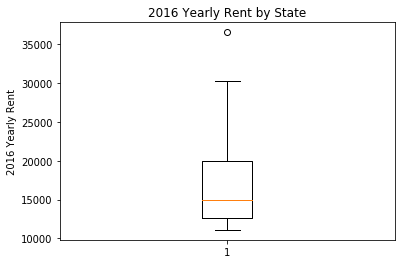

In [9]:
#See if there are 2016 outliers in rent
fig1, ax1 = plt.subplots() 
rent_16 = all["2016 Yearly Rent"]
ax1.set_title('2016 Yearly Rent by State') 
ax1.set_ylabel('2016 Yearly Rent')
ax1.boxplot(rent_16) 
plt.show()

In [10]:
#Isolate 2016 outlier using quartiles
quartiles = rent_16.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = all.loc[(all['2016 Yearly Rent'] < lower_bound) | (all['2016 Yearly Rent'] > upper_bound)] 
outliers

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.,2015 Total Homeless,2016 Total Homeless,2017 Total Homeless
31,New York,37200.0,36570.0,38700.0,-630.0,2130.0,60017,62758,62447,2741,-311,88250,86352,89503


In [11]:
no_outliers_16 =  all.loc[(all['2016 Yearly Rent'] > lower_bound) & (all['2016 Yearly Rent'] < upper_bound)]

The r-squared: 0.47058046048281893


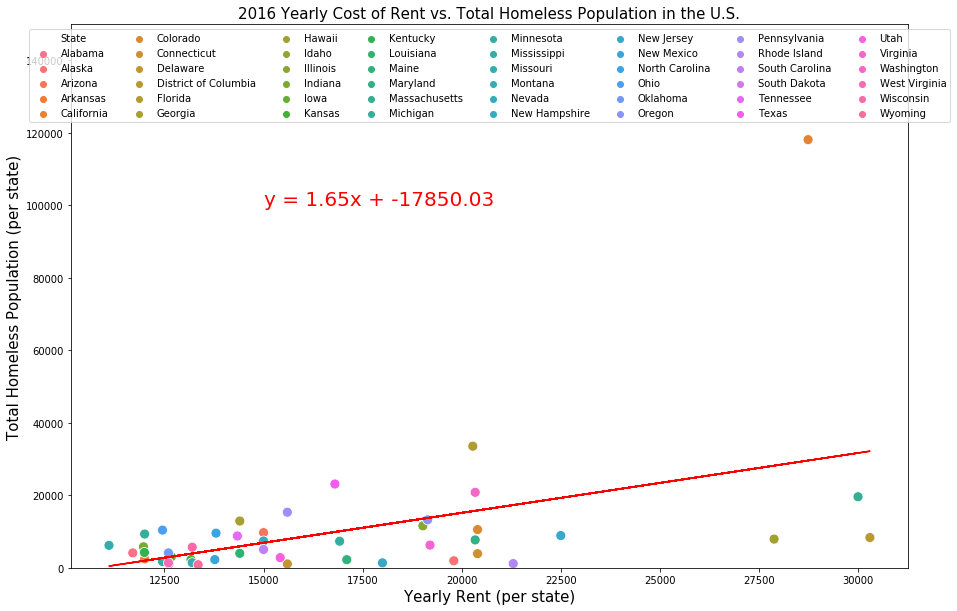

In [35]:
#2015 correlation b/w rent price and homelessness (excluding previously excluding states and outliers: NY, MA)
x_values = no_outliers_16["2016 Yearly Rent"].astype('float')
y_values = no_outliers_16["2016 Total Homeless"].astype('float')
states = no_outliers_16["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(15000,100000),fontsize=20,color="red")
plt.ylim(0,150000)
plt.xlabel('Yearly Rent (per state)', fontsize=15)
plt.ylabel('Total Homeless Population (per state)',fontsize=15)
plt.title("2016 Yearly Cost of Rent vs. Total Homeless Population in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=8)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2016_rent_vs_homeless.png")
plt.show()

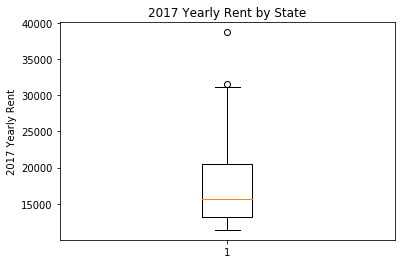

In [13]:
#Find outliers in rent 2017
fig1, ax1 = plt.subplots() 
rent_17 = all["2017 Yearly Rent"]
ax1.set_title('2017 Yearly Rent by State') 
ax1.set_ylabel('2017 Yearly Rent')
ax1.boxplot(rent_17) 
plt.show()

In [14]:
#Isolate outliers 2017 rent
quartiles = rent_17.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = all.loc[(all['2017 Yearly Rent'] < lower_bound) | (all['2017 Yearly Rent'] > upper_bound)] 
outliers

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.,2015 Total Homeless,2016 Total Homeless,2017 Total Homeless
4,California,27510.0,28740.0,31500.0,1230.0,2760.0,65843,68070,69759,2227,1689,115738,118142,134278
31,New York,37200.0,36570.0,38700.0,-630.0,2130.0,60017,62758,62447,2741,-311,88250,86352,89503


In [15]:
no_outliers_17 = all.loc[(all['2017 Yearly Rent'] > lower_bound) & (all['2017 Yearly Rent'] < upper_bound)]

The r-squared: 0.393404706919361


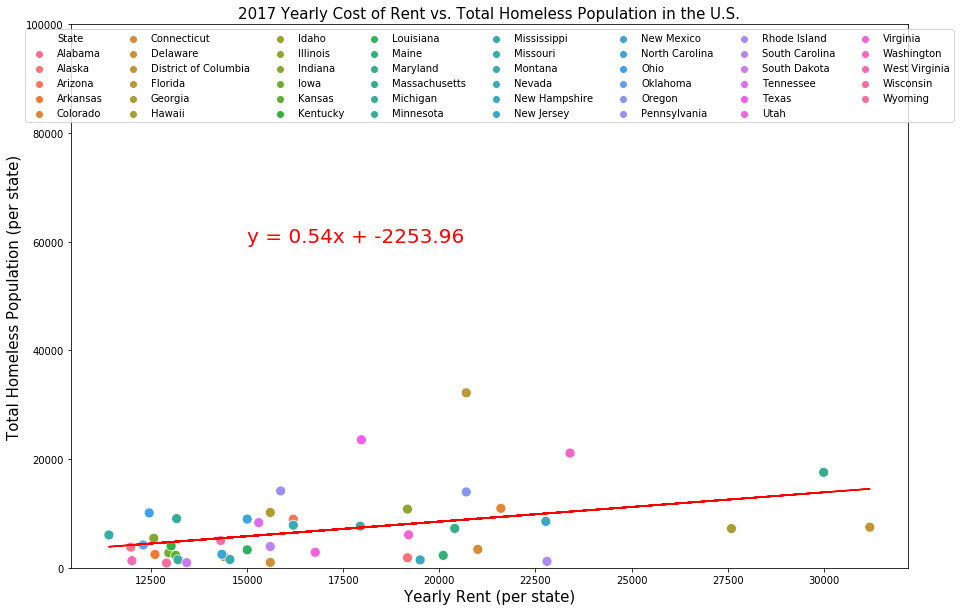

In [36]:
#2017 correlation b/w rent price and homelessness
x_values = no_outliers_17["2017 Yearly Rent"].astype('float')
y_values = no_outliers_17["2017 Total Homeless"].astype('float')
states = no_outliers_17["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(15000,60000),fontsize=20,color="red")
plt.ylim(0,100000)
plt.xlabel('Yearly Rent (per state)', fontsize=15)
plt.ylabel('Total Homeless Population (per state)',fontsize=15)
plt.title("2017 Yearly Cost of Rent vs. Total Homeless Population in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=8)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2017_rent_vs_homeless.png")
plt.show()

In [17]:
#See if there's a correlation between changes in homeless pop and rent prices
all["'15-'16 Homeless Diff."] = all["2016 Total Homeless"] - all["2015 Total Homeless"]
all["'16-'17 Homeless Diff."] = all["2017 Total Homeless"] - all["2016 Total Homeless"]
all

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.,2015 Total Homeless,2016 Total Homeless,2017 Total Homeless,'15-'16 Homeless Diff.,'16-'17 Homeless Diff.
0,Alabama,11400.0,11700.0,11970.0,300.0,270.0,46053,48237,51113,2184,2876,3970,4111,3793,141,-318
1,Alaska,20190.0,19800.0,19170.0,-390.0,-630.0,77717,77351,72231,-366,-5120,1956,1940,1845,-16,-95
2,Arizona,14700.0,15000.0,16200.0,300.0,1200.0,54060,58328,61125,4268,2797,9896,9707,8947,-189,-760
3,Arkansas,12000.0,12000.0,12600.0,0.0,600.0,44282,46894,48829,2612,1935,2560,2463,2467,-97,4
4,California,27510.0,28740.0,31500.0,1230.0,2760.0,65843,68070,69759,2227,1689,115738,118142,134278,2404,16136
5,Colorado,19500.0,20400.0,21600.0,900.0,1200.0,68906,72084,74172,3178,2088,9953,10550,10940,597,390
6,Connecticut,21000.0,20400.0,21000.0,-600.0,600.0,75417,77556,72780,2139,-4776,4047,3902,3388,-145,-514
7,Delaware,15600.0,15600.0,15600.0,0.0,0.0,59759,59294,62318,-465,3024,953,1070,994,117,-76
8,District of Columbia,30000.0,30300.0,31200.0,300.0,900.0,72501,72508,83382,7,10874,7298,8350,7473,1052,-877
9,Florida,19800.0,20280.0,20700.0,480.0,420.0,50518,52277,53681,1759,1404,35900,33559,32190,-2341,-1369


The r-squared: 0.176962552567277


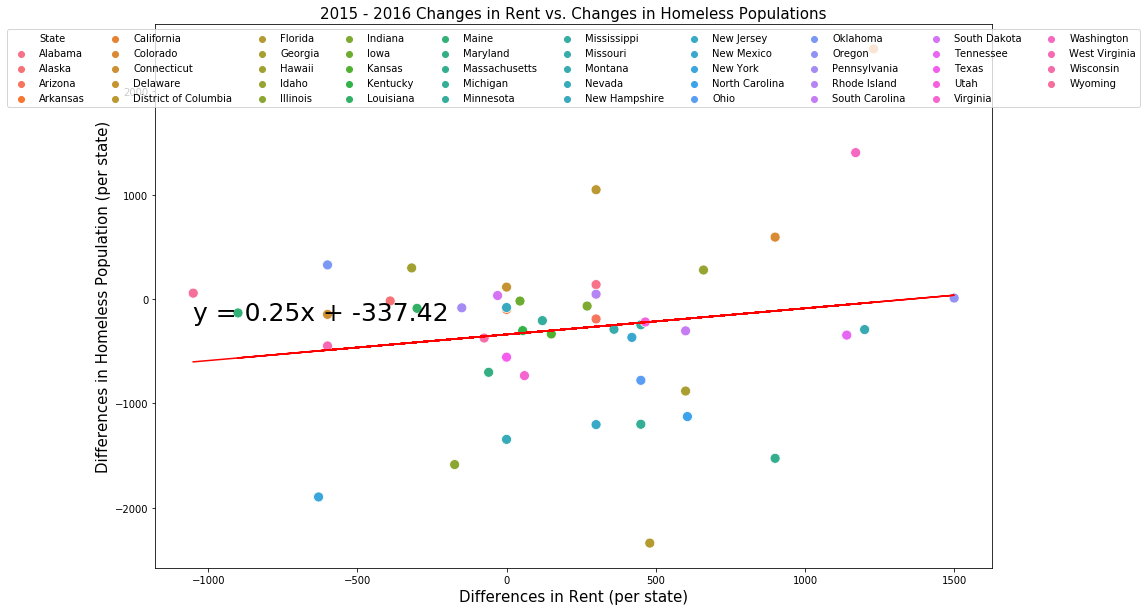

In [18]:
#2015-2016 correlation b/w changes in rent price and homeless pop
x_values = all["'15-'16 Rent Diff."].astype('float')
y_values = all["'15-'16 Homeless Diff."].astype('float')
states = all["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(min(x_values), -200),fontsize=25,color="black")
plt.xlabel('Differences in Rent (per state)', fontsize=15)
plt.ylabel('Differences in Homeless Population (per state)',fontsize=15)
plt.title("2015 - 2016 Changes in Rent vs. Changes in Homeless Populations", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/15-16_rent_vs_homeless.png")
plt.show()

The r-squared: 0.416440304909459


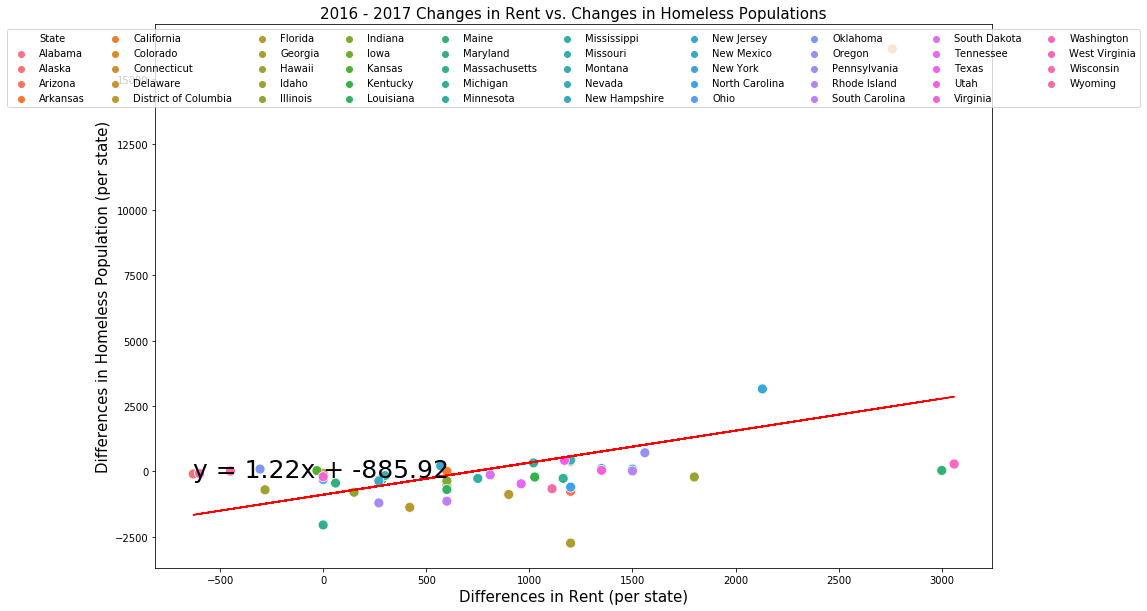

In [19]:
#2016-2017 correlation b/w changes in rent price and homeless pop
x_values = all["'16-'17 Rent Diff."].astype('float')
y_values = all["'16-'17 Homeless Diff."].astype('float')
states = all["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(min(x_values), -200),fontsize=25,color="black")
plt.xlabel('Differences in Rent (per state)', fontsize=15)
plt.ylabel('Differences in Homeless Population (per state)',fontsize=15)
plt.title("2016 - 2017 Changes in Rent vs. Changes in Homeless Populations", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/16-17_rent_vs_homeless.png")
plt.show()

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


The r-squared: 0.4079824286815662


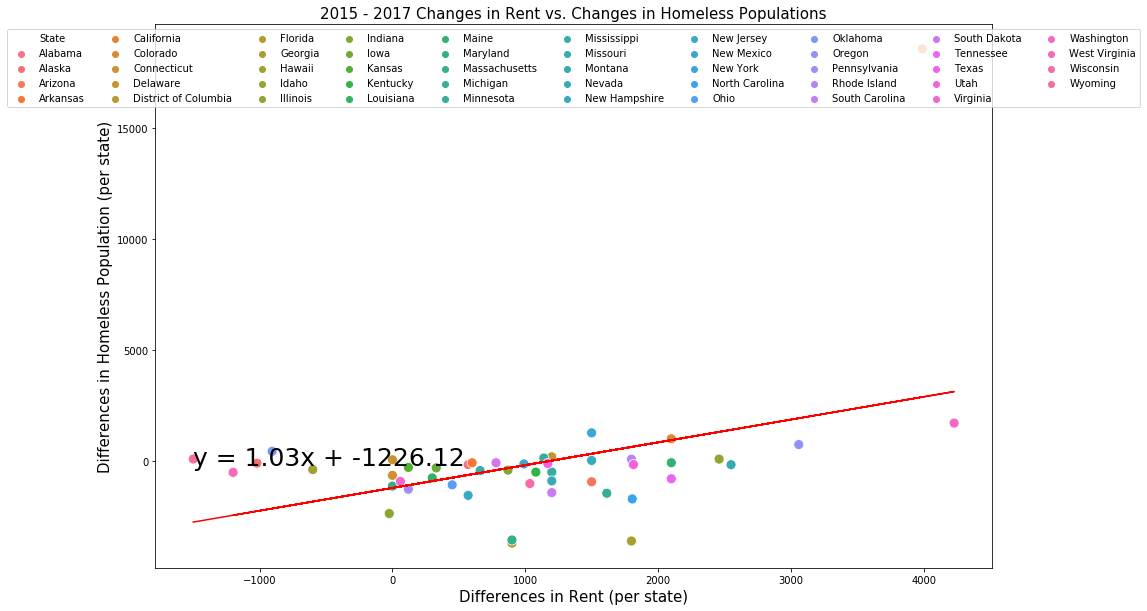

In [20]:
#Look more long-term, check 2015 - 2017 for homeless change vs. rent change
longterm = all[["State"]]
longterm["'15-17 Rent Diff."] = all["2017 Yearly Rent"] - all["2015 Yearly Rent"]
longterm["'15-17 Homeless Diff."] = all["2017 Total Homeless"] - all["2015 Total Homeless"]

#See if there's a correlation here
x_values = longterm["'15-17 Rent Diff."].astype('float')
y_values = longterm["'15-17 Homeless Diff."].astype('float')
states = longterm["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(min(x_values), -200),fontsize=25,color="black")
plt.xlabel('Differences in Rent (per state)', fontsize=15)
plt.ylabel('Differences in Homeless Population (per state)',fontsize=15)
plt.title("2015 - 2017 Changes in Rent vs. Changes in Homeless Populations", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/15-17_rent_vs_homeless.png")
plt.show()

The r-squared: 0.1244846629781142


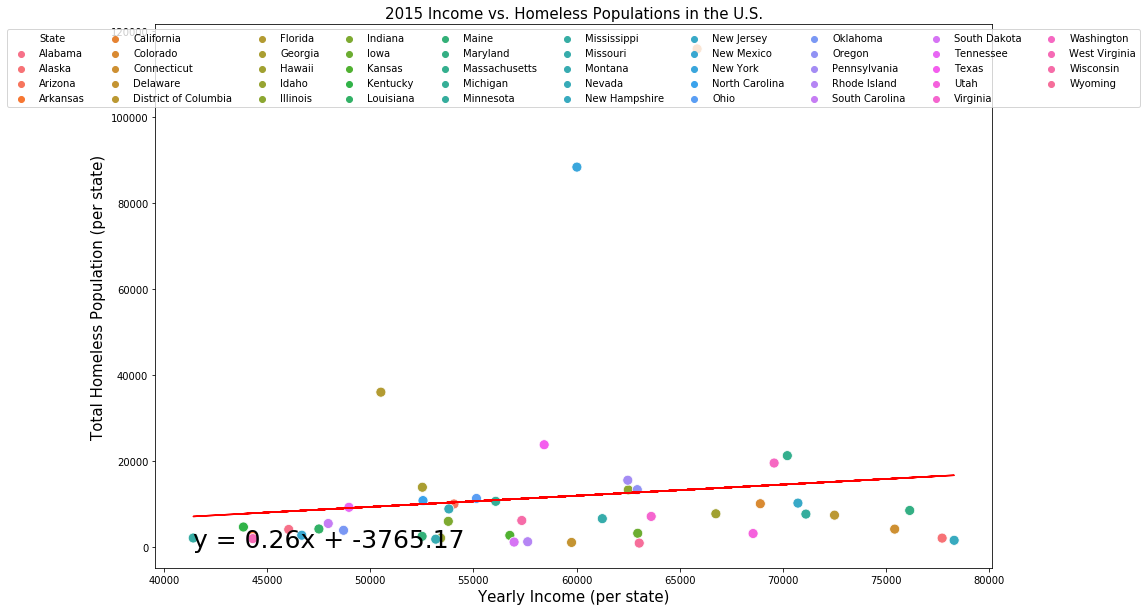

In [21]:
#See if theres a correlation b/w income and homelessness - do higher income states have more homelessness (bigger wealth gap?)
#2015
#See if there's a correlation here
x_values = all["2015 Income"].astype('float')
y_values = all["2015 Total Homeless"].astype('float')
states = all["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(min(x_values), -200),fontsize=25,color="black")
plt.xlabel('Yearly Income (per state)', fontsize=15)
plt.ylabel('Total Homeless Population (per state)',fontsize=15)
plt.title("2015 Income vs. Homeless Populations in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2015_income_vs_homeless.png")
plt.show()

The r-squared: 0.15654581389013147


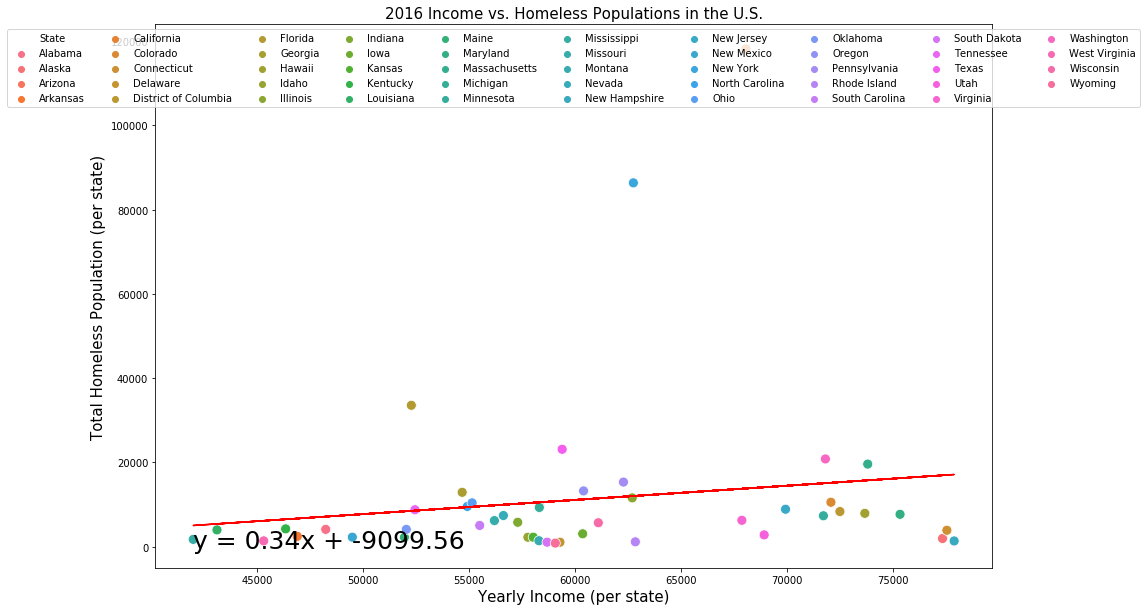

In [22]:
#See if theres a correlation b/w income and homelessness - do higher income states have more homelessness (bigger wealth gap?)
#2016
#See if there's a correlation here
x_values = all["2016 Income"].astype('float')
y_values = all["2016 Total Homeless"].astype('float')
states = all["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(min(x_values), -200),fontsize=25,color="black")
plt.xlabel('Yearly Income (per state)', fontsize=15)
plt.ylabel('Total Homeless Population (per state)',fontsize=15)
plt.title("2016 Income vs. Homeless Populations in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2016_income_vs_homeless.png")
plt.show()

The r-squared: 0.1551523386244987


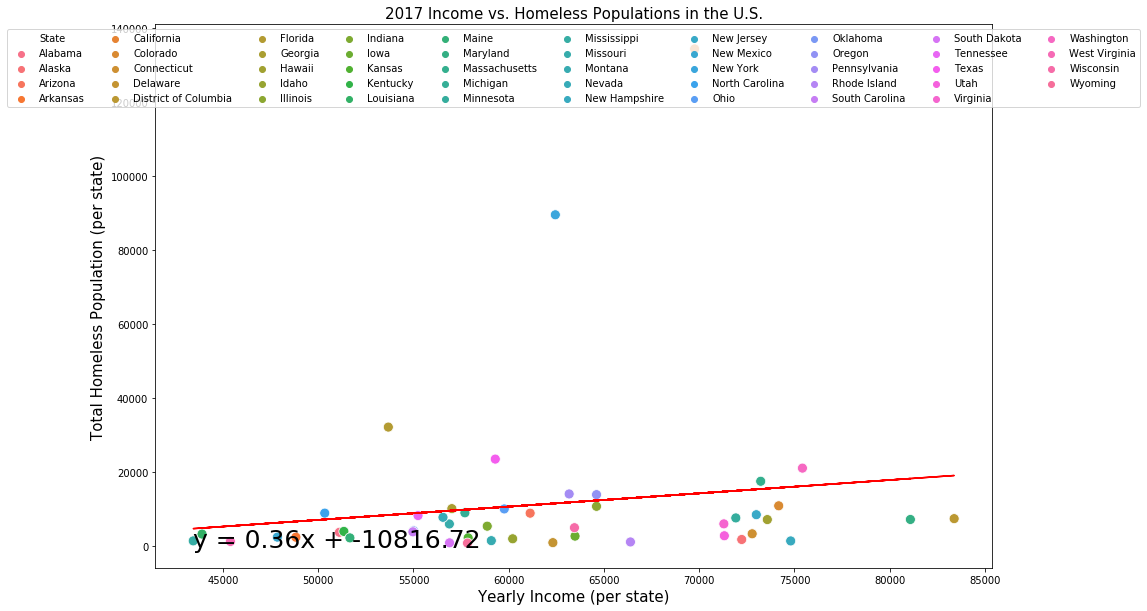

In [23]:
#See if theres a correlation b/w income and homelessness - do higher income states have more homelessness (bigger wealth gap?)
#2016
#See if there's a correlation here
x_values = all["2017 Income"].astype('float')
y_values = all["2017 Total Homeless"].astype('float')
states = all["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(min(x_values), -200),fontsize=25,color="black")
plt.xlabel('Yearly Income (per state)', fontsize=15)
plt.ylabel('Total Homeless Population (per state)',fontsize=15)
plt.title("2017 Income vs. Homeless Populations in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2017_income_vs_homeless.png")
plt.show()

The r-squared: -0.010210315545956663


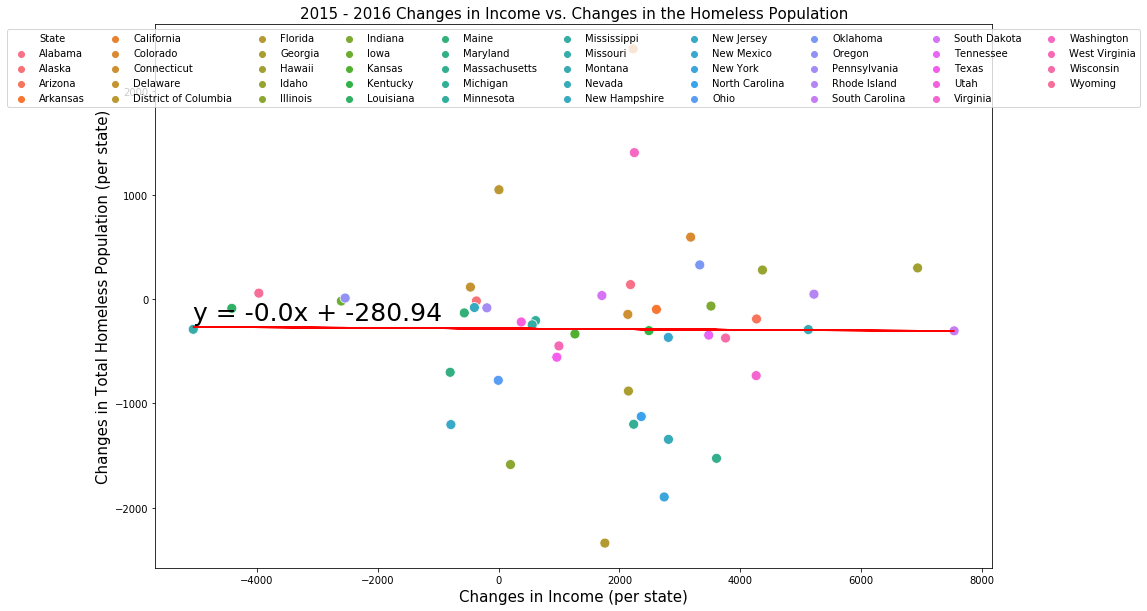

In [24]:
#See if theres a correlation b/w change in income and change in homelessness
#2015-2016
#See if there's a correlation here
x_values = all["'15-'16 Income Diff."].astype('float')
y_values = all["'15-'16 Homeless Diff."].astype('float')
states = all["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(min(x_values), -200),fontsize=25,color="black")
plt.xlabel('Changes in Income (per state)', fontsize=15)
plt.ylabel('Changes in Total Homeless Population (per state)',fontsize=15)
plt.title("2015 - 2016 Changes in Income vs. Changes in the Homeless Population", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/15-16_income_vs_homeless.png")
plt.show()

The r-squared: -0.00882958435992538


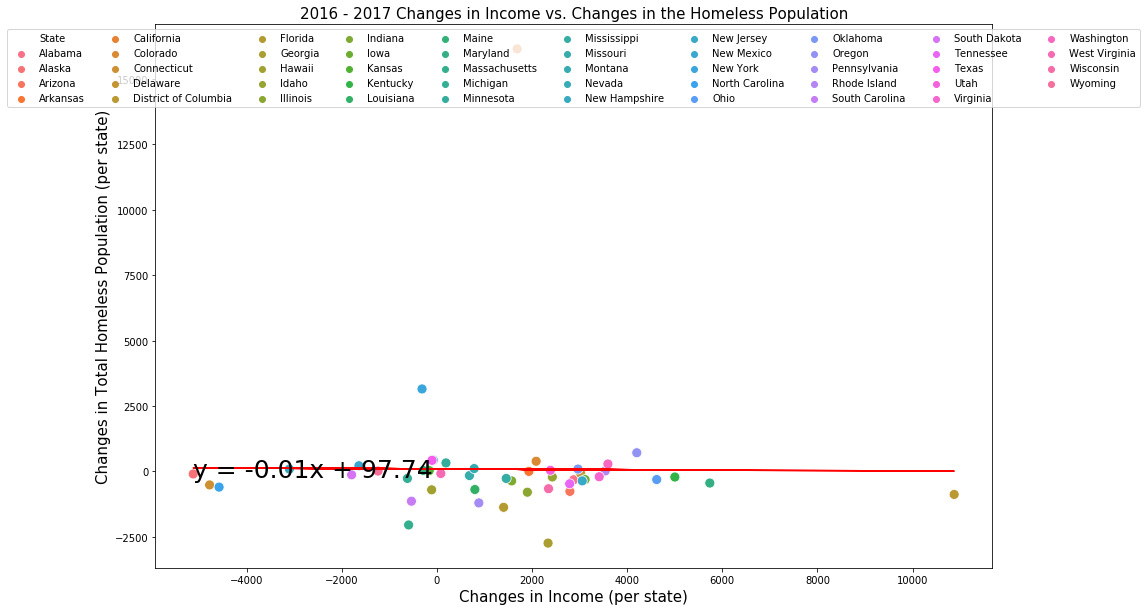

In [25]:
#See if theres a correlation b/w change in income and change in homelessness
#2015-2016
#See if there's a correlation here
x_values = all["'16-'17 Income Diff."].astype('float')
y_values = all["'16-'17 Homeless Diff."].astype('float')
states = all["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(min(x_values), -200),fontsize=25,color="black")
plt.xlabel('Changes in Income (per state)', fontsize=15)
plt.ylabel('Changes in Total Homeless Population (per state)',fontsize=15)
plt.title("2016 - 2017 Changes in Income vs. Changes in the Homeless Population", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/16-17_income_vs_homeless.png")
plt.show()